In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
df = pd.read_csv('2D_collected.csv')

In [3]:
num_sets = len(list(set(df['run_idx'])))

In [4]:
SETS = []

for i in range(num_sets):
    _df = df[df['run_idx'] == i]
    t_array = _df['t_lag']
    _t = []
    for _ in t_array:
        _t.append(ast.literal_eval(_))
    _t = np.array(_t)
    SETS.append([_df['alpha'].values, _df['alpha*'].values, _t])

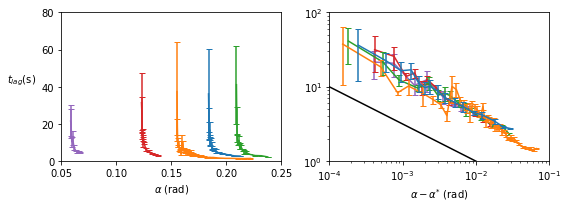

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (8, 3))

for i in range(len(SETS)):
    _ang = SETS[i][0]
    _ast = SETS[i][1]
    _per = SETS[i][2]
    axes[0].errorbar(_ang, np.mean(_per, axis = 1), yerr = np.std(_per, axis = 1),
                     zorder = - i, capsize = 3, lw = 1.5)
    
    axes[1].errorbar(_ang - _ast, np.mean(_per, axis = 1), yerr = np.std(_per, axis = 1),
                     zorder = - i, capsize = 3, lw = 1.5)

xx = np.linspace(1e-4, 0.01, 1000)
axes[1].plot(xx, 0.1 / (xx) ** (1 / 2), color = 'black')
    
axes[0].set_xlim(0.05, 0.25)    
axes[0].set_ylim(0, 80)   

axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_xlim(1e-4, 1e-1)
axes[1].set_ylim(1, 100)
axes[0].set_ylabel(r'$t_{lag}$(s)', rotation = 0, labelpad = 20)
axes[0].set_xlabel(r'$\alpha$ (rad)')
axes[1].set_xlabel(r'$\alpha-\alpha^{*}$ (rad)')
plt.tight_layout()

plt.savefig('result.pdf')